## Case de IA - Customer churn

<p align='center'>
    <img src='https://www.questionpro.com/blog/wp-content/uploads/2018/03/churn.png'>
</p>

Neste case básico de IA, vamos analisar um dataset de churn de clientes de uma empresa de telecomunicações. O objetivo é criar um modelo de Machine Learning que seja capaz de prever se um cliente irá ou não cancelar seu plano.


O objetivo é que você tenha seu primeiro contato com um problema de Machine Learning, que você consiga entender como é mais ou menos o fluxo de trabalho e, principalmente, vá aprendendo os principais conceitos conforme for realizando.


Ao longo do case passaremos por tópicos como:

1. Visualização, análise e tratamento de dados
2. Split dos dados em treino e teste
3. Padronização dos dados
4. Criação de um modelo de Machine Learning
5. Avaliação do modelo
6. Otimização dos hiperparâmetros do modelo


## Referências gerais:
- https://www.datacamp.com/tutorial/introduction-machine-learning-python
- https://app.datacamp.com/learn/courses/machine-learning-with-scikit-learn (Capítulos 1 e 3)
- Livro: Introduction to Machine Learning with Python (Capítulo 2) - https://drive.google.com/drive/u/1/folders/10VdWCaR7qZ40K9rC5gWviKWMkMPzK8FB

Mais referências ao longo do case

### 0 - Antes de tudo...

Existem muitas formas de se resolver um problema de Machine Learning, no entanto, o **workflow** a ser seguido geralmente segue essa estrutura:
<p align='center'>
    <img src='https://editor.analyticsvidhya.com/uploads/80329Roadmap.PNG'>
</p>

Assim, comece importando as bibliotecas básicas, e carregando o dataset.

In [1]:
# Importa as bibliotecas que serão utilizadas na resolução dos exercícios

import pandas as pd
import numpy as np

In [4]:
# Lê o csv que será usado para treinamento do modelo e o transforma em um DataFrame do pandas
df = pd.read_csv("Churn_train.csv")

# Exibe o DataFrame
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


### 1 - Data Prep

Provavelmente, a etapa mais importante do processo. É a etapa de entendimento do problema a ser resolvido, entendimento dos dados que você possui e, principalmente, tratamento desses dados para poder extrair o máximo de informação possível.

Veja aqui algumas referências para um bom Data Prep:
- https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/
- https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e

O objetivo aqui é verficar se os dados estão certinhos para serem utilizados em modelos. Assim,

- Verifique o tipo das variáveis (existem números como strings, por exemplo?)  
- Verifique se há valores nulos
- Verifique se há valores duplicados
- Verifique a presença de outliers (aqui pode ser bem útil plotar gráficos de distribuição das variáveis)
- Qual coluna é a variável *target* (aquilo que queremos prever)?
- Quais features são necessárias e quais não são?

### Encoding

Muitos algoritmos não só conseguem trabalhar com dados numéricos. Assim, um tratamento necessário é a transformação de variáveis categóricas em numéricas. 

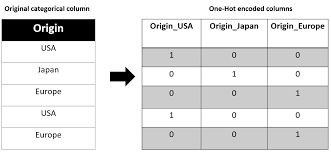

São formas de encoding mais comuns:
- Dummy encoding
- One-hot encoding
- Label encoding

Dê uma pesquisada nesses métodos e veja qual a forma mais adequada para as variáveis categóricas

### Matriz de correlação
Uma forma eficiênte de se ter uma ideia da relação entre as variáveis é saber como elas se correlacionam umas com as outras. Plote uma matriz de correlação e veja quais variáveis parecem mais correlacionadas com o target.

#### Bônus
Uma coisa que vocês precisam saber é que, apesar de parecer muito difícil no começo, Machine Learning em python é uma mãe e sempre existe uma forma mais incrivelmente fácil de se fazer qualquer coisa.

Depois de fazer toda a sua análise exploratória, teste o *pandas_profiling* e veja o que ele te retorna.

### Data split
Para um algoritmo de Machine Learning funcionar, é necessário que ele primeiro aprenda com uma certa quantidade dos dados disponíveis a identificar padrões. A esse conjunto, chamamos de "treino".

Após o treino, é necessário verficar como ele lida diante de novos dados. Esse conjunto com a outra parte dos dados, chamamos de "teste". Sendo assim, divida seu dataset em treino e teste.

### Scaling
Último ponto dessa etapa. Veja que as variáveis possuem escalas diferentes. Enquanto algumas variáveis estão na casa das dezenas, outras estão na casa das centenas. Isso pode ser um problema para alguns algoritmos de Machine Learning, que podem acabar dando mais importância para as variáveis com maior escala. Transforme seus dados de modo com que fiquem na mesma escala

### 2 - Criação do modelo

Existem dois principais tipos de problemas de ML: regressão e classificação. Enquanto o primeiro se refere à previsão de valores numéricos, o segundo, como o nome já diz, se refere à classificação de valores em categorias.

Para classificação, existem alguns algoritmos mais comuns que você pode tentar:
Cursos:
- [Supervised Learning with scikit-learn - DataCamp](https://app.datacamp.com/learn/courses/machine-learning-with-scikit-learn)
- [Linear Classifiers in python - DataCamp](https://app.datacamp.com/learn/courses/linear-classifiers-in-python)

Vídeos:
- [Vídeo do Dev sobre Random Forest](https://www.youtube.com/watch?v=ho1eI54ykoU&pp=ygUHZmVhIGRldg%3D%3D)
- [StatsQuest: LogisticRegression (teoria)](https://www.youtube.com/watch?v=yIYKR4sgzI8)
- [StatsQuest: KNN (teoria)](https://www.youtube.com/watch?v=HVXime0nQeI&pp=ugMICgJwdBABGAE%3D)


Escolha pelo menos dois modelos. Treine e teste com os dados que você separou anteriormente e gere as previsões

### 3 - Avaliação do modelo

Uma vez feitas as previsões, é preciso verificar o quão próximas da realidade elas foram. Para problemas de classificação, as métricas mais comuns de se utilizar são: acurácia, precisão e AUC. Você pode ter uma melhor visualização nesse cheat sheet:

<p align='center'>
    <img src='https://miro.medium.com/v2/resize:fit:828/format:webp/1*wEniP5HewaUSHeIF1_bEiw.png'>

Para um entendimento mais profundo sobre cada uma das métricas, seguem também algumas referências:

- [StatsQuest: ROC e AUC](https://www.youtube.com/watch?v=4jRBRDbJemM&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=7)
- [StatsQuest: Confusion Matrix](https://www.youtube.com/watch?v=Kdsp6soqA7o&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=3)
- [12 Important Model Evaluation Metrics for Machine Learning Everyone Should Know ](https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/)

**Avalie as previsões do seu modelo e veja qual deles se saiu melhor.**

### 4 - Otimização do modelo
Cada função do scikit-learn na verdade tem vários parâmetros que podem ser ajustados a depender dos seus dados e do seu objetivo e nem sempre os valores padrão são os melhores. O processo de otimização desses hiperparâmetros nada mais é do que iterar sobre as diferentes possibilidades de valores que esses parâmetros podem assumir e ver qual combinação deles gera o melhor resultado.

A forma mais comum de realizar essa otimização é através do GridSearch CV, mas a biblioteca Optuna também é uma excelente opção.

O capítulo 3 do curso de Supervised Learning oferece um guia de como realizar esse processo - https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn

**Realize a otimização dos hiperparâmetros**

### Hyperparameter tunning